# 一元线性回归

## 数据准备

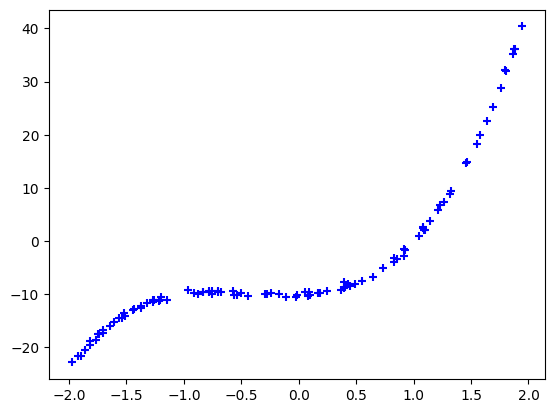

In [173]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x=4 *np.random.rand(100,1)-2
#直线
y=1+5*x+np.random.randn(100,1)*0.3
#三次函数
y=4*(x**3)+5*(x**2)+x-10+np.random.randn(100,1)*0.3
plt.scatter(x,y,marker='+',color='blue')

## 数据预处理&输入

In [174]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

#将x,y从numpy转为torch
x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float()

#将x,y合并为数据集
dataset=TensorDataset(x,y)

#分批，分为16批，shuffle为true意味着打乱数据
dataloader=DataLoader(dataset,batch_size=16,shuffle=True)


## 数据处理

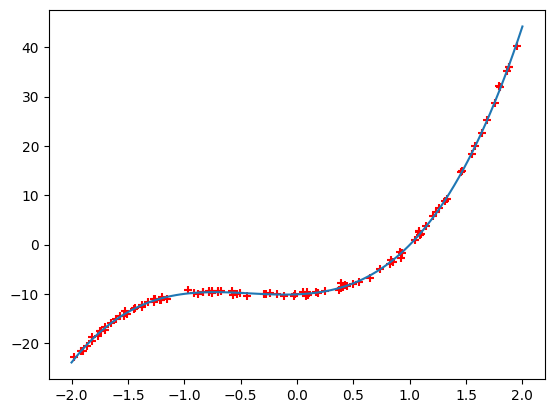

In [175]:
epoch=500 #迭代次数
lr=0.01 #学习率
# w=torch.randn(1,requires_grad=True) #斜率
# b=torch.randn(1,requires_grad=True) #截距
a=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
c=torch.randn(1,requires_grad=True)
d=torch.randn(1,requires_grad=True)
Loss=[] #损失
#进行多次迭代
for i in range(1,1+epoch):
    #处理一轮
    for index_id,(bx,by) in enumerate(dataloader):
        #预测
        #h=bx*w+b
        h=a*(bx**3)+b*(bx**2)+c*bx+d
        #计算损失
        loss= torch.mean((h-by)**2)
        #计算梯度
        loss.backward()
        #更新学习率
        # w.data-=lr*w.grad.data
        # b.data-=lr*b.grad.data
        a.data-=lr*a.grad.data
        b.data-=lr*b.grad.data
        c.data-=lr*c.grad.data
        d.data-=lr*d.grad.data

        # 梯度清零,否则会累加到之前的梯度上
        # w.grad.zero_()
        # b.grad.zero_()
        a.grad.zero_()
        b.grad.zero_()
        c.grad.zero_()
        d.grad.zero_()

#提取张量w中的元素值。假设w是一个只有一个元素的torch.Tensor，这个语句将w的值提取出来，转换为Python的标准数据类型。
# w=w.item()
# b=b.item()
a=a.item()
b=b.item()
c=c.item()
d=d.item()
#使用numpy库的linspace函数在0至2之间均匀地生成100个数值，这些数作为x轴的值，用于绘制拟合直线。
# xx=np.linspace(0,2,100)
# h=w * xx+ b
xx=np.linspace(-2,2,100)
h=a*(xx**3)+b*(xx**2)+c*xx+d
#使用matplotlib库的plot函数绘制拟合曲线。
plt.plot(xx,h)
plt.scatter(x,y,marker='+',color='red')
plt.show()
